## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

## Load the data
#### To load the dataset, we use pandas library and function to read the CSV file of Singapore Airbnb 2019–2020 dataset and convert it to the DataFrame and check the top 5 index data.

In [2]:
df =pd.read_csv('listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


# Data Exploration

### Get the list of columns

In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Calling info() on our dataset tells us tons of information about our data frame like the shape (rows, columns), the data type of our features, and the memory usage.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

### Dimension of listing dataset in number of rows and columns

In [5]:
df.shape

(7907, 16)

### Statistical Description of the data

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


### Understanding numerical values

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical = df.select_dtypes(include=numerics)
numerical.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### Understanding Categorical values

In [8]:
categorical = ['object','bool']

categorical = df.select_dtypes(include=categorical)
categorical.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

# Data Wrangling/Data Cleaning

### Missing data points in each column

In [9]:
missing =df.isnull().sum()
missing

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

#### From the above we can concude the following: The 'name' & 'last_review' columns are irrelevant for our analysis, we can either drop these columns or keep it out of the analysis.The 'reviews_per_month' column we can simply append it with 0.0 for missing values

### Drop all unnecessary Columns

In [10]:
df.drop(['name','last_review'], axis=1, inplace=True)

In [11]:
df.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,0.01,2,365
1,50646,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,0.28,1,365
2,56334,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,0.20,2,365
3,71609,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,0.15,9,353
4,71896,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,0.22,9,355


### Imputing missing values with 0 in 'reviews_per_month' column

In [12]:
df.fillna({'reviews_per_month':0}, inplace=True)

# Data Analysis & Exploration

## Unique values of the ‘neighbourhood_group’ that  consists of a list of all the Singapore region

In [13]:
df['neighbourhood_group'].unique()

array(['North Region', 'Central Region', 'East Region', 'West Region',
       'North-East Region'], dtype=object)

## Number of Room types 

In [14]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

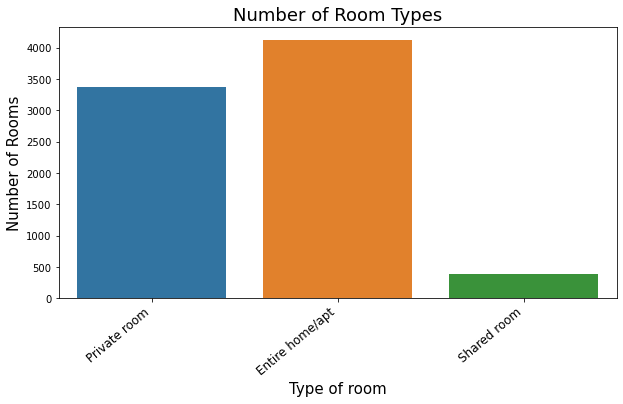

Entire home/apt    4132
Private room       3381
Shared room         394
Name: room_type, dtype: int64

In [23]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(x='room_type', data=df)
plt.title('Number of Room Types', fontsize=18)

#set the axes
ax.set_xlabel('Type of room', weight='normal', size=15)
ax.set_ylabel('Number of Rooms', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size =12)

plt.show()

df.room_type.value_counts()

## Types of room by neighbourhood regions

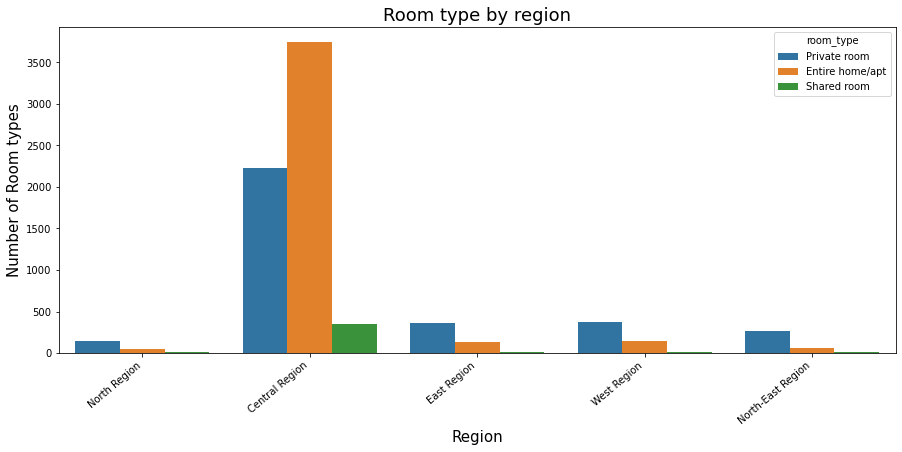

In [25]:
plt.figure(figsize = (15, 6))
ax = sns.countplot(x='neighbourhood_group', hue='room_type', data=df)

#set the axes
ax.set_xlabel('Region', weight='normal', size=15)
ax.set_ylabel('Number of Room types', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.title('Room type by region', fontsize=18)

plt.show()

## Top 10 hosts in terms of listing count

In [15]:
top_host_id = df['host_id'].value_counts().head(10)
top_host_id

66406177     274
8492007      203
209913841    157
29420853     141
31464513     114
219550151    113
2413412      112
108773366    109
23722617      84
8948251       83
Name: host_id, dtype: int64

Text(0, 0.5, 'Count of listings')

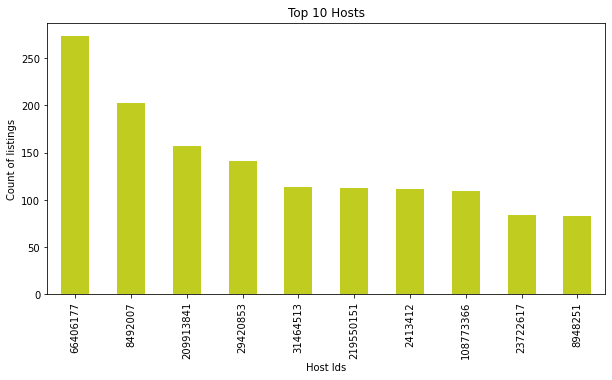

In [16]:
top_host_id[:10].plot(kind='bar' , title = 'Top 10 Hosts', figsize=(10,5), color = '#c1cc21')
plt.xlabel("Host Ids")
plt.ylabel("Count of listings")

## Top Region Area

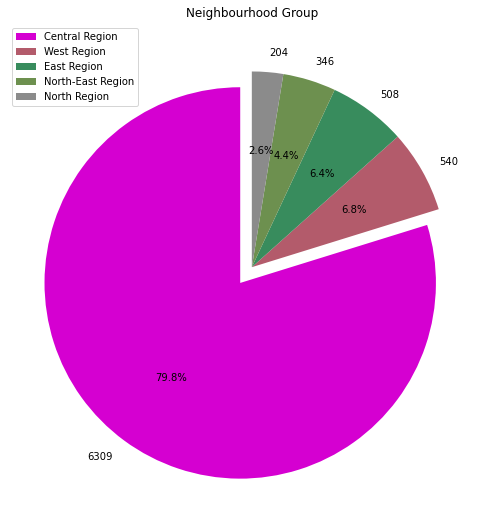

In [17]:
labels = df.neighbourhood_group.value_counts().index
colors = ['#d500d1','#b35b6b','#388c5d','#6d904f','#8b8b8b']
explode = (0.1,0,0,0,0)
shape = df.neighbourhood_group.value_counts().values
plt.figure(figsize=(15,9))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group')
plt.show()

### From the above we can infer that Central Region has the most listings covering more than 80% of the total listings.

## Neighbourhood having highest listings

In [21]:
highest_listing=df.neighbourhood.value_counts().head(10)
highest_listing

Kallang          1043
Geylang           994
Novena            537
Rochor            536
Outram            477
Bukit Merah       470
Downtown Core     428
Bedok             373
River Valley      362
Queenstown        266
Name: neighbourhood, dtype: int64

Text(0, 0.5, 'Count of listings')

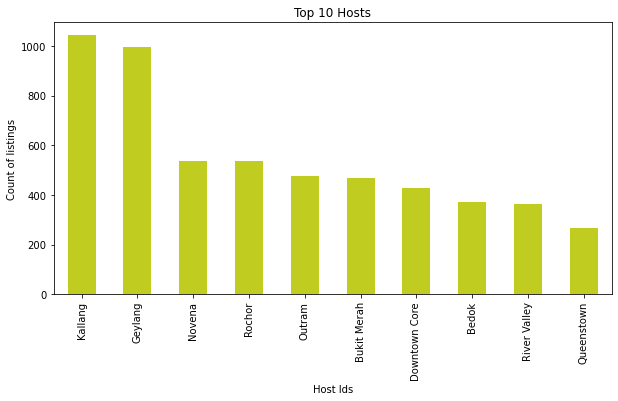

In [22]:
highest_listing[:10].plot(kind='bar' , title = 'Top 10 Hosts', figsize=(10,5), color = '#c1cc21')
plt.xlabel("Host Ids")
plt.ylabel("Count of listings")

### As we can see, Kallang has the highest number of listings. We also found that 9 out of the top 10 planning areas are located in the Central Region, with Bedok located in East Region as an exception.

## Visualization of Listings in the map by region

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


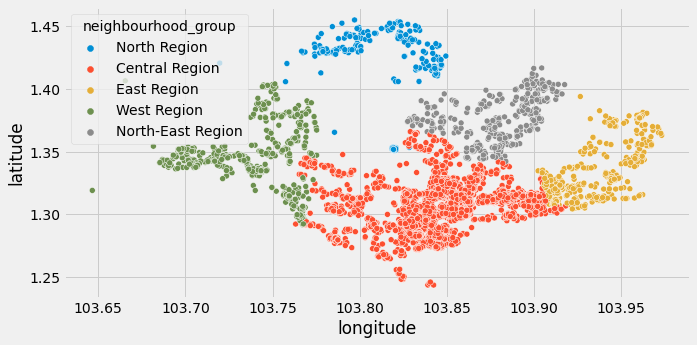

In [38]:
plt.figure(figsize=(10,5))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

### From the map above, we can see clearly where the densest listing is located in Central region

## Average price for each room type

In [42]:
df_price_room_type = pd.DataFrame(df.groupby(['room_type']).mean()['price'].sort_values())
df_price_room_type

,price
room_type,
Shared room,65.675127
Private room,110.938480
Entire home/apt,226.998306


Text(0, 0.5, ' Room Type')

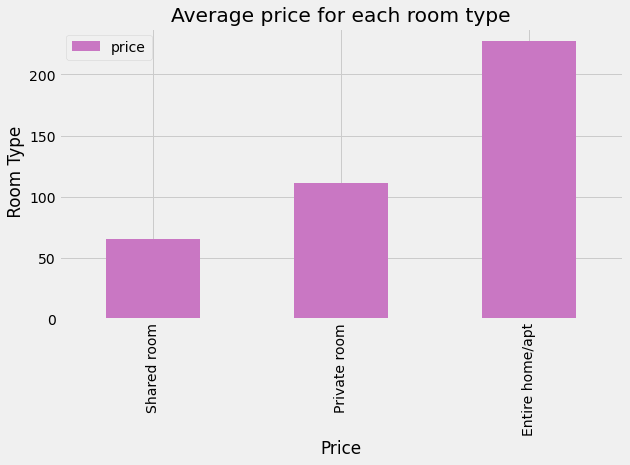

In [64]:
df_price_room_type.plot(kind='bar' , title = 'Average price for each room type', figsize=(9,5), color = '#c977c3')
plt.xlabel("Price")
plt.ylabel(" Room Type")

## Minimum Nights by room type

In [58]:
min_nights = df.groupby(['room_type']).mean()['minimum_nights'].sort_values()
min_nights

room_type
Shared room         4.055838
Entire home/apt    15.495644
Private room       21.539781
Name: minimum_nights, dtype: float64

Text(0, 0.5, ' Minimum Nights')

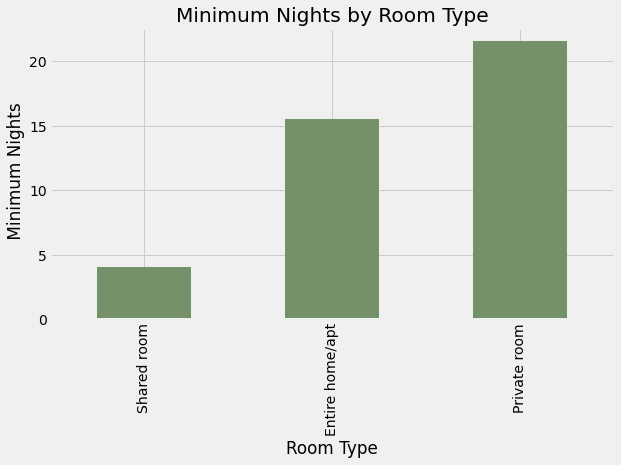

In [63]:
min_nights.plot(kind='bar' , title = 'Minimum Nights by Room Type', figsize=(9,5), color = '#74916a')
plt.xlabel("Room Type")
plt.ylabel(" Minimum Nights")

## Price Distribution by Region

### Before we visualize the price map, we need to update the dataset by removing some of the outlier data as some data prices have value far from the IQR
### Before handling outliers, we will detect them. Boxplot is the best way to see outliers.

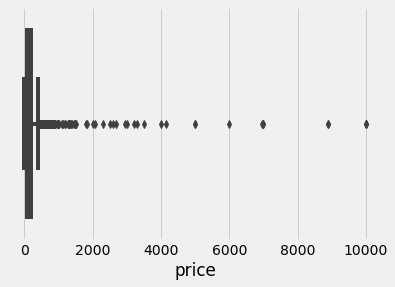

In [84]:
sns.boxplot(x=df['price'])
plt.show()

### With the describe method of pandas, we can see our data’s Q1 (%25) and Q3 (%75) percentiles. We can calculate our IQR point and boundaries (with 1.5).


In [85]:
df[['price']].describe()

,price
count,7907.000000
mean,169.332996
std,340.187599
min,0.000000
25%,65.000000
50%,124.000000
75%,199.000000
max,10000.000000


In [92]:
Q1=df['price'].quantile(0.25)
Q1

65.0

In [93]:
Q3=df['price'].quantile(0.75)
Q3

199.0

In [90]:
IQR=Q3-Q1
IQR

134.0

In [91]:
upper_limit=Q3+1.5*IQR
upper_limit

400.0

### From the we can see that the upper limit is 400. This means above  400 all the values are way beyond the IQR. Hence we will ignore all the values above 400

In [ ]:
airbnb_1 = df[df.price < 400]

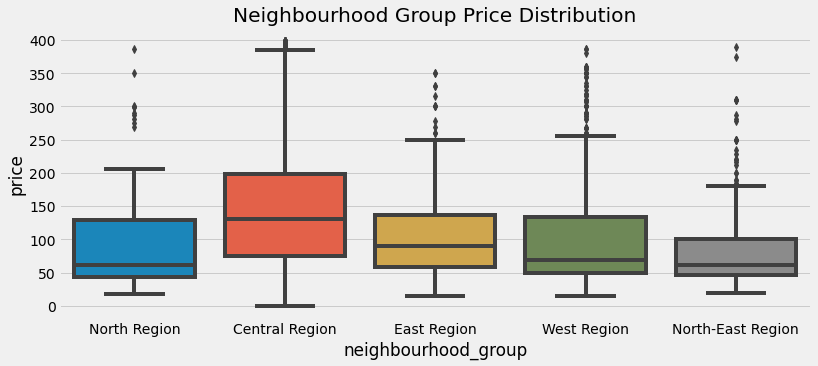

In [95]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,5))
sns.boxplot(y='price',x='neighbourhood_group',data = airbnb_1)
plt.title('Neighbourhood Group Price Distribution')
plt.show()

### From the data above, we see the Central Region has the most expensive price per night with a median $ 130

## Price Map

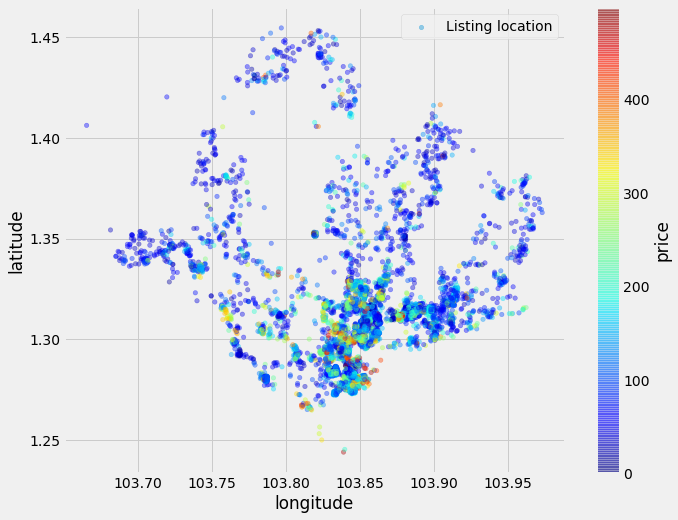

In [98]:
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='Listing location', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

### From the map above, we observe the price relatively going up towards the center part of the Central Region

## Top 10 most reviewed listings

In [100]:
df.nlargest(10, 'number_of_reviews')

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
132,2129215,7642747,Shirley,East Region,Bedok,1.32122,103.91492,Entire home/apt,139,2,323,4.72,1,239
140,2357514,1346787,Val,Central Region,Outram,1.28448,103.84360,Private room,69,1,307,5.44,3,315
470,5827998,30080617,Eddie,East Region,Tampines,1.34463,103.96107,Private room,60,2,296,5.56,7,0
1237,10848771,44793532,Yuan,Central Region,Toa Payoh,1.33431,103.87554,Private room,49,1,296,6.96,2,288
722,7605283,34333799,Felix,Central Region,Bukit Merah,1.27718,103.82167,Private room,72,3,291,6.05,1,186
264,4108082,21313007,Callie & Kel,Central Region,Tanglin,1.29312,103.82979,Entire home/apt,218,2,289,4.90,1,231
469,5827713,30080617,Eddie,East Region,Tampines,1.34495,103.96043,Private room,69,90,285,5.40,7,365
765,7843168,40912923,Erin,Central Region,Geylang,1.31422,103.90481,Private room,40,1,285,5.86,4,0
3196,21509015,156290352,Su,East Region,Pasir Ris,1.36287,103.97342,Private room,85,1,276,12.60,2,287
1433,12299983,14326542,Your Home Away From Home,Central Region,Museum,1.30009,103.84502,Entire home/apt,446,1,272,6.95,4,304


### Again, we found out the majority of the most reviewed listing is located in the Central Region, with 6 out of 10 listings.

## Insights Drawn:

### 1. There are 3 types of room; entire home/apt, shared room, private room
### 2. Central Region has the most listings covering more than 80% of the total listings.¶
### 3. Price relatively going up towards the center part of the Central Region
### 4. Majority of the most reviewed listing is located in the Central Region, with 6 out of 10 listings.¶
### 5. Kallang has the highest number of listings. We also found that 9 out of the top 10 planning areas are located in the Central Region, with Bedok located in East Region as an exception.
### 6. The Central Region has the most expensive price per night with a median $ 130.